In [1]:
%%timeit x = range(10000)
    max(x)

1000 loops, best of 3: 253 µs per loop


## Parte 1

In [2]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

import numpy as np
X = np.concatenate((datos1, datos2), axis=0)
#shift
n = 20
#ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y =  np.concatenate((y1,y2),axis=0)
#Para visualizar las fronteras de los distintos algoritmos clasificadores utilice el siguiente codigo:
%matplotlib inline
import matplotlib.pyplot as plt

def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02
    # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

(a)  Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un shift desde el  conjunto  2  al  1,esto  se  puede  ver  en  la  imagen  anterior,  donde  el  conjunto  de  color naranjo  (media  luna)  tiene  puntos  azules  a  la derecha  pertenecientes  al  otro  conjunto,  esto  es  con el  mismo  propósito  de  trabajar  con  un dataset no ideal.  Determine  cuantos registros  contiene cada conjunto y visualícelos.

In [3]:
print ("El conjunto X tiene "+str(X.shape[0])+" filas y "+str(X.shape[1])+" columnas")

print ("El conjunto y tiene "+str(y.shape[0])+" filas y 1 columna")


El conjunto X tiene 1000 filas y 2 columnas
El conjunto y tiene 1000 filas y 1 columna


(b)  Entrene  el  clasificador *Linear  Discriminant  Analysis (LDA)*  y  visualice  la  frontera  de  decisi ́on  que define este algoritmo. analice cualitativamente lo que observa.

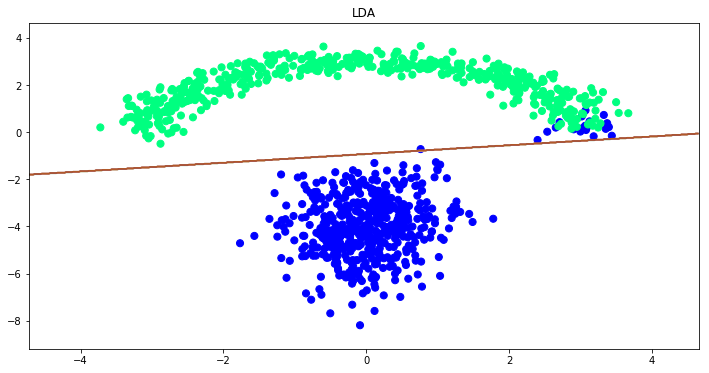

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X,y)
ypredLDA = model.predict(X)
visualize_border(model,X,y,"LDA")

(c) Entrene el clasificador *Quadratic Discriminant Analysis(QDA)* y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qu ́e se asemejan ¿Qué distribución de probabilidad asumen cada uno?

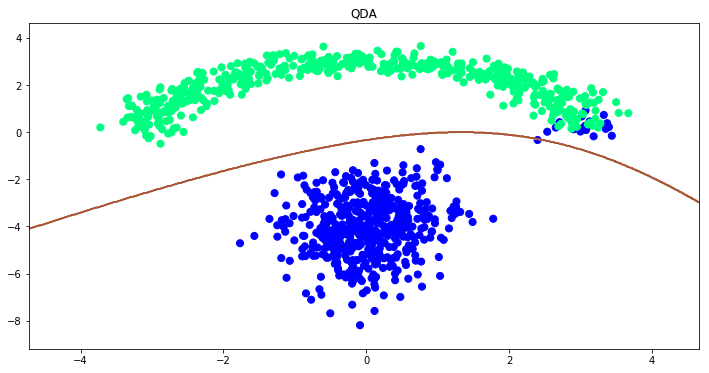

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X,y)
ypredQDA = model.predict(X)
visualize_border(model,X,y,"QDA")

(d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica de error de clasificación.

In [6]:
from sklearn.metrics import accuracy_score
def accuracy(y_true,y_pred):
    print("Miss Classification Loss: %f"%(1-accuracy_score(y_true,y_pred)))

accuracy(y,ypredLDA)
accuracy(y,ypredQDA)

Miss Classification Loss: 0.021000
Miss Classification Loss: 0.019000


(e) Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_{2}$), experimente con distintos valores del parámetro de regularización mediante  el  gráfico  interactivo.  Explique el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [7]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

In [8]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR()
    #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min =0.1
#define your range
p_max =10.0

#define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Widget Javascript not detected.  It may not be installed or enabled properly.


In [9]:
accuracy(y,ypredLDA)

Miss Classification Loss: 0.021000


(f) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante la imagen interactiva explore  diferentes valores del parámetro de regularización C. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [10]:
from sklearn.svm import SVC as SVM
def train_model(param):
    model = SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
#useinteractive
stringtipo = 'linear'

In [11]:
interactive(visualize_border_interactive,param=(p_min,p_max))

Widget Javascript not detected.  It may not be installed or enabled properly.


(g)  Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal. Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con diferentes *kernels*. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [12]:
def train_model(param):
    model = SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    return model

In [13]:
interactive(visualize_border_interactive,param=(p_min,p_max))

Widget Javascript not detected.  It may not be installed or enabled properly.


(h)  Construya un Árbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes valores del parámetro de máxima profunidad del ́arbol. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [14]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree()
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model

In [15]:
p_min=1
p_max=50
interactive(visualize_border_interactive,param=(p_min,p_max))

Widget Javascript not detected.  It may not be installed or enabled properly.


(i)  Construya un algoritmo *k-N N* para la clasificación del problema. Mediante la imagen interactiva explore diferentes valores del parámetro k. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model=KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model

In [17]:
p_min=1
p_max=50
interactive(visualize_border_interactive,param=(p_min,p_max))

Widget Javascript not detected.  It may not be installed or enabled properly.


## Parte 2 Análisis de audios como datos brutos

In [19]:
from scipy.io import wavfile

SAMPLE_RATE = 44100

def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

(a)  Construya un dataframe con los datos a analizar. Describa el dataset y determine cu ́antos registros hay por clase.

(b)  Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.

(c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4], el cual afirma que estos cambios son requeridos. Vuelva a determinar cu´antos registros hay por clase. N´otese que ahora son 3 clases ¿Explique la problem´atica de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?

(d) Codifique las distintas clases a valores num´ericos para que puedan ser trabajados por los algoritmos clasificadores.

(e) Desordene los datos, evitando as´ı el orden en el que vienen la gran mayor´ıa de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ´esta indica que puede generar problemas? ¿De qu´e tipo?

(f) Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la sen˜al de sonido.

(g) Para seguir con el pre procesamiento realice un muestreo representativo de los datos a trav´es de una t´ecnica de muestreo especializada en secuencias ¿En qu´e beneficia este paso? ¿C´omo podr´ıa determinar si el muestro es representativo?

(h) Genere un conjunto de pruebas mediante la t´ecnica *hold-out validation* para verificar la calidad de los clasificadores. ¿Cu´antas clases tiene y de qu´e taman˜o queda cada conjunto?

(i) Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviaci´on est´andar) con el conjunto de entrenamiento.

(j) Realice una reducci´on de dimensionalidad a trav´es de la t´ecnica PCA, para representar los datos en d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyecci´on en 2 dimensiones.

(k) Entrene un modelo de Regresi´on Log´ıstica variando el par´ametro de regularizacion C construyendo un gr´afico resumen del error en funci´on de este hiper-par´ametro. Adem´as entrene una M´aquina de Soporte Vectorial (SVM) con kernel lineal, variando el hiper-par´ametro de regularizacion C en el mismo rango que para la Regresi´on Log´ıstica, construyendo el mismo gr´afico resumen. Compare.

(l) Entrene un Arbol de Decisi´on, con la configuraci´on que estime conveniente, variando el hiper-par´ametro´ regularizador max depth, construyendo un gr´afico resumen del error en funci´on de este par´ametro. Compare con los modelos anteriores.

(m)	Experimente con diferentes dimensiones d para la proyecci´on de PCA con el prop´osito de obtener un modelo con menor error. Construya una tabla o gr´afico resumen.

(n)	Realice otra reducci´on de dimensionalidad ahora a trav´es de la t´ecnica LDA, para representar los datos en d = 2 dimensiones. Recuerde que s´olo se debe ajustar con el conjunto de entrenamiento, si semmuestra un warning explique el porqu´e. Visualice apropiadamente la proyecci´on en 2 dimensiones.

(o)	Con el prop´osito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio generado por la representaci´on segu´n las d dimensiones de la proyecci´on LDA. Esta nueva representaci´on ¿mejora o empeora el desempen˜o? Explique.

(p)	Intente mejorar el desempen˜o de los algoritmos ya entrenados. Disen˜e ahora sus propias cracter´ısticas (feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [6] [7] si desea.

## Parte 3 Análisis de emociones en tweets

(a) Construya un dataframe con los datos a analizar. Determine cu´antas clases existen, cu´antos registros por clase y describa el *dataset*.

In [86]:
import pandas as pd
df = pd.read_csv("text_emotion.csv")

In [87]:
pd.crosstab(df['author'],df['sentiment'],margins=True)

sentiment,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry,All
author,,,,,,,,,,,,,,
000yea000,0,0,0,0,0,0,0,1,0,0,0,0,0,1
001BabyGirl,0,0,0,0,0,0,0,0,1,0,0,0,0,1
00mouse2000,0,0,0,0,0,0,0,0,0,0,1,0,0,1
06Di06,0,0,0,0,0,0,0,0,0,0,0,0,1,1
08vintagelove,0,0,0,0,0,0,0,1,0,0,0,0,0,1
0BS0L33T,0,0,0,0,0,0,0,0,1,0,0,0,0,1
0CandacENicolE0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
0liviaa,0,0,0,0,0,0,0,0,0,0,0,0,1,1
0m4r,0,0,0,0,0,1,0,0,0,0,0,0,0,1


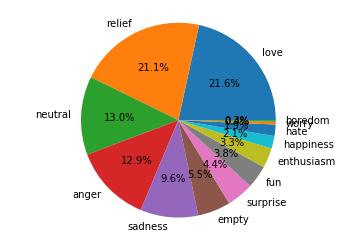

In [102]:
sentiment_counts = df['sentiment'].value_counts()
#print sentiment_counts
#print list(set(df.sentiment.values))
plt.pie(sentiment_counts,labels=list(set(df.sentiment.values)),autopct='%1.1f%%')
plt.axis('equal')
plt.show()

(b) Construya un conjunto de entrenamiento y otro de pruebas, a trav´es de una m´ascara aleatoria, para verificar los resultados de los algoritmos.

In [71]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

(c)	Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato est´andarizado en el cual se podr´an trabajar.

In [72]:
#preproccesing functions
def coding(col,codeDict):
    colCoded = pd.Series(col,copy=True)
    for key,value in codeDict.items():
        colCoded.replace(key,value,inplace=True)
    return colCoded
def num_missing(x):
    return sum(x.isnull())

In [66]:
# Se nota que no faltan datos en el df
print df.apply(num_missing,axis=0)

sentiment           0
author              0
content             0
normalized_tweet    0
dtype: int64


In [73]:
df.drop(['tweet_id'],axis=1,inplace=True)
df.head()

,sentiment,author,content
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [74]:
#estandarizacion del texto en la columna content mediante liberias de re y nlt
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

#Cambia el texto de cualquier forma presente a minusculas
def normalizer(content):
    without_user_name = re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)"," ",content)
    without_links = re.sub("https?:\/\/.*[\r\n]*"," ",without_user_name)
    short_words = re.sub("\b\w\b"," ",without_links)
    #without_hashtags = re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)"," ",without_links)
    only_letters = re.sub("[^a-zA-Z]", " ",short_words) 
    tokens = nltk.word_tokenize(only_letters)
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t,pos='v') for t in filtered_result]
    return lemmas


In [75]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
df['normalized_tweet'] = df.content.apply(normalizer)

In [76]:
df[['content','normalized_tweet']].head(100)

,content,normalized_tweet
0,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,"[know, listenin, bad, habit, earlier, start, freakin, part]"
1,Layin n bed with a headache ughhhh...waitin on your call...,"[layin, n, bed, headache, ughhhh, waitin, call]"
2,Funeral ceremony...gloomy friday...,"[funeral, ceremony, gloomy, friday]"
3,wants to hang out with friends SOON!,"[want, hang, friends, soon]"
4,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.","[want, trade, someone, houston, ticket, one]"
5,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,"[ping, go, prom, bc, bf, like, friends]"
6,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!","[sleep, im, think, old, friend, want, marry, damn, amp, want, scandalous]"
7,Hmmm. http://www.djhero.com/ is down,[hmmm]
8,@charviray Charlene my love. I miss you,"[charlene, love, miss]"
9,@kelcouch I'm sorry at least it's Friday?,"[sorry, least, friday]"


(d)	Haga una reducci´on binaria al problema, para trabajarlo como un problema de clasificaci´on de dos clases. Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los datos puede afectar considerablemente al modelo.

In [77]:
dictionary = {"anger": -1,"boredom": -1,"empty": -1,"enthusiasm": 1,"fun": 1,"happiness": 1,"hate": -1,"love": 1,"neutral": 1,"relief": 1,"sadness": -1,"surprise" : -1,"worry": -1}
df['sentiment'] = coding(df['sentiment'],dictionary)

 1    21750
-1    18250
Name: sentiment, dtype: int64


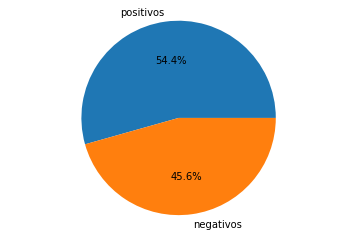

In [84]:
sentiment_counts = df['sentiment'].value_counts()
print sentiment_counts
plt.pie(sentiment_counts,labels=['positivos','negativos'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

(e)	Para construir un clasificador que determine autom´aticamente la polaridad de un trozo de texto, ser´a necesario representar los tweets $\{t_{i}\}^{n}_{i=1}$ disponibles como vectores de caracter´ısticas (features). El tipo de caracter´ısticas m´as utilizado consiste en contar cu´antas veces aparecen ciertos t´erminos/palabras en el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la uni´on de todas las palabras que se observen en los tweets.

(f)	Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificaci´on binaria (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresi´on log´ıstica, SVM y Arboles de decisi´on) sobre el conjunto de entrenamiento verificando su desempen˜o sobre ambos conjuntos (entrenamiento y de pruebas), construyendo un gr´afico resumen del error de ´estos

(g)	Utilice y explique las m´etricas que calcula la funci´on classification report de la librer´ıa sklearn. En base a las distintas m´etricas calculadas ¿Cu´ales clasificadores son los que mejor se comportan?

[Opcional] Visualice las predicciones de algu´n modelo generativo (probabil´ıstico) definido anteriormente, tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el clasificador a cada clase.

(i)	Ahora deber´a extender el problema a las mu´ltiples clases que tiene presente (las distintas emociones), es decir, su trabajo ser´a el de predecir una de las distintas emociones de cada tweet. Para esto utilice el mismo pre-procesamiento realizado en el punto c) y las caracter´ısticas generadas mediante las t´ecnicas en el punto e). Recuerde que tendr´a que codificar las distintas clases como valores num´ericos enteros.

(j)	Utilice los clasificadores que son extendidos por defecto a mu´ltiples clases para detectar emociones en cada tweet, muestre sus desempen˜os a trav´es del error de pruebas en un gr´afico resumen.

(k)	Utilice clasificadores binarios que pueden ser extendidos a trav´es de otras t´ecnicas, tal como One vs One y One vs All/Rest [14]

(l) Para el caso de la Regresi´on Log´ıstica compare sus dos m´etodos para ser extendidos a mu´ltiples clases. Uno a trav´es de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos mediante otras t´ecnicas, construya una tabla o gr´afico resumen. Los clasificadores que mejor se comportan en el caso binario ¿Siguen teniendo ese desempen˜o en mu´ltiples clases?